#### Install Matterport MaskRCNN

In [1]:
!pip uninstall tensorflow --quiet

Proceed (y/n)? y
y


In [2]:
!pip install tensorflow-gpu==1.14.0 --quiet

     |████████████████████████████████| 377.0MB 46kB/s 
     |████████████████████████████████| 491kB 54.0MB/s 
     |████████████████████████████████| 3.2MB 56.4MB/s 


In [3]:
!pip list | grep tensorflow

tensorflow-addons        0.8.3          
tensorflow-datasets      2.1.0          
tensorflow-estimator     1.14.0         
tensorflow-gcs-config    2.1.8          
tensorflow-gpu           1.14.0         
tensorflow-hub           0.8.0          
tensorflow-metadata      0.21.2         
tensorflow-privacy       0.2.2          
tensorflow-probability   0.9.0          


In [1]:
!git clone https://github.com/matterport/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.82 MiB | 30.76 MiB/s, done.
Resolving deltas: 100% (568/568), done.


In [4]:
!ls -l

total 8
drwxr-xr-x 10 root root 4096 Apr 18 11:46 Mask_RCNN
drwxr-xr-x  1 root root 4096 Apr  3 16:24 sample_data


In [5]:
%cd Mask_RCNN
!ls -l

/content/Mask_RCNN
total 251588
drwxr-xr-x 2 root root      4096 Apr 18 11:44 assets
drwxr-xr-x 4 root root      4096 Apr 18 11:45 build
drwxr-xr-x 2 root root      4096 Apr 18 11:45 dist
drwxr-xr-x 2 root root      4096 Apr 18 11:44 images
-rw-r--r-- 1 root root      1095 Apr 18 11:44 LICENSE
-rw-r--r-- 1 root root        58 Apr 18 11:44 MANIFEST.in
-rw-r--r-- 1 root root 257557808 Apr 18 11:46 mask_rcnn_coco.h5
drwxr-xr-x 2 root root      4096 Apr 18 11:45 mask_rcnn.egg-info
drwxr-xr-x 3 root root      4096 Apr 18 11:46 mrcnn
-rw-r--r-- 1 root root     13771 Apr 18 11:44 README.md
-rw-r--r-- 1 root root       119 Apr 18 11:44 requirements.txt
drwxr-xr-x 6 root root      4096 Apr 18 11:44 samples
-rw-r--r-- 1 root root        99 Apr 18 11:44 setup.cfg
-rw-r--r-- 1 root root      2518 Apr 18 11:44 setup.py


In [4]:
!pip3 install -r requirements.txt 

     |████████████████████████████████| 163kB 8.9MB/s 
     |████████████████████████████████| 204kB 26.6MB/s 


In [5]:
!python3 setup.py install

running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py -> build/bdist.linux-x86_64/egg/mrcnn

#### Load Model for Prediction

In [6]:
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Using TensorFlow backend.


Download a pre-trained model on COCO dataset

In [7]:
utils.download_trained_weights('mask_rcnn_coco.h5')

... done downloading pretrained model!


Modify model confifuration for inference task

In [7]:
from samples.coco import coco

class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

Load Model

In [8]:
!ls -l

total 251588
drwxr-xr-x 2 root root      4096 Apr 18 11:44 assets
drwxr-xr-x 4 root root      4096 Apr 18 11:45 build
drwxr-xr-x 2 root root      4096 Apr 18 11:45 dist
drwxr-xr-x 2 root root      4096 Apr 18 11:44 images
-rw-r--r-- 1 root root      1095 Apr 18 11:44 LICENSE
-rw-r--r-- 1 root root        58 Apr 18 11:44 MANIFEST.in
-rw-r--r-- 1 root root 257557808 Apr 18 11:46 mask_rcnn_coco.h5
drwxr-xr-x 2 root root      4096 Apr 18 11:45 mask_rcnn.egg-info
drwxr-xr-x 3 root root      4096 Apr 18 11:46 mrcnn
-rw-r--r-- 1 root root     13771 Apr 18 11:44 README.md
-rw-r--r-- 1 root root       119 Apr 18 11:44 requirements.txt
drwxr-xr-x 6 root root      4096 Apr 18 11:44 samples
-rw-r--r-- 1 root root        99 Apr 18 11:44 setup.cfg
-rw-r--r-- 1 root root      2518 Apr 18 11:44 setup.py


In [9]:
model = modellib.MaskRCNN(mode='inference', config=config, model_dir='')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [0]:
model.load_weights('mask_rcnn_coco.h5', by_name=True)

#### Model Prediction

COCO dataset class names

In [0]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Run model detection on random images in 'images' folder

In [0]:
import os
import skimage.io
import random

Processing 1 images
image                    shape: (511, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


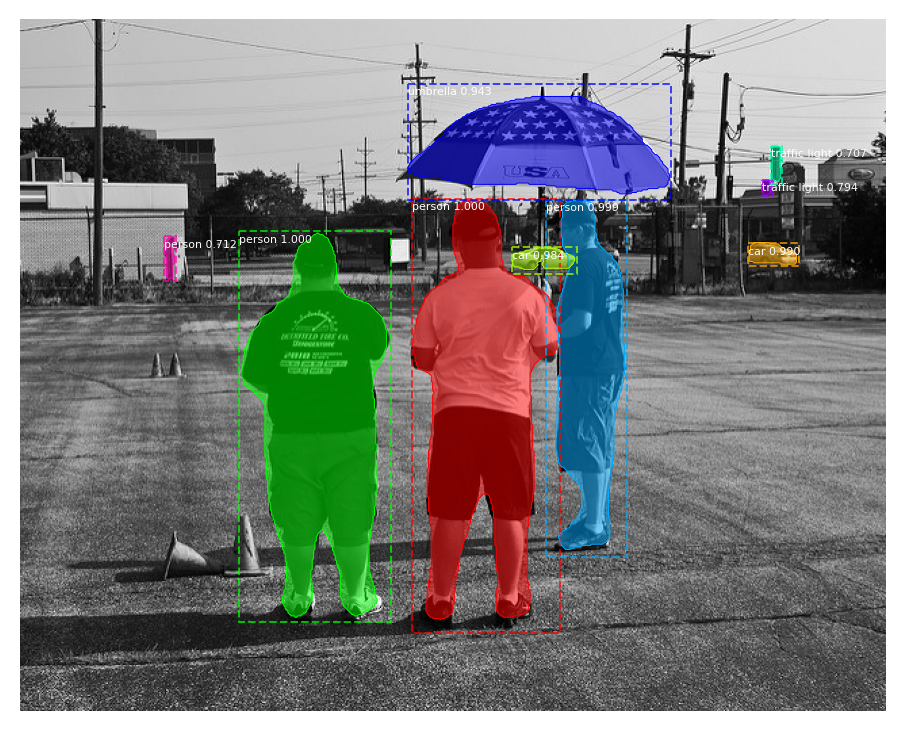

In [18]:
file_names = next(os.walk('images'))[2]
image = skimage.io.imread(os.path.join('images', random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [0]:
from matplotlib import pyplot as plt

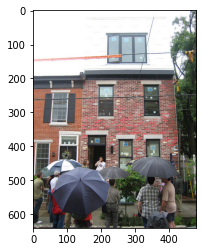

In [17]:
plt.imshow(image)
plt.show()

In [19]:
image.shape

(511, 640, 3)

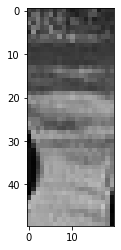

In [22]:
plt.imshow(image[200:250, 270:290, :])